In [2]:
# install tensorflow and pytorch packages
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Define the oscillatory function
def oscillatory_function(x):
    y = np.zeros_like(x)
    y[x<0] = 5 + np.sum([np.sin(k * x[x < 0]) for k in range(1, 7)])
    y[x >= 0] = np.cos(10 * x[x >= 0])
    return y

def generate_dataset(num_points, method = 'Equispaced'):
    if method == 'equi-spaced':
        x = np.linspace(-1, 1, num_points)
    if method == 'random':
        x = np.random.uniform(-1, 1, num_points)
    y = oscillatory_function(x)
    return  x, y

# Build the model

def build_model(activation, input_dim = 1, output_dim = 1):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation = activation, input_shape = (input_dim, )),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(output_dim)
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse')
    return model

def train_and_evaluate(x_train, y_train, x_test, y_test, activation, epochs = 200):
    model = build_model(activation)
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(x_test)
    return y_pred

# Plot the results
def plot_results(x_train, y_train, x_test, y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label='Train Data', color='blue', s=10)
    plt.plot(x_test, y_test, label='True Function', color='green')
    plt.plot(x_test, y_pred, label='Predicted Function', color='red')
    plt.title(title)
    plt.legend()
    plt.show()

# Main function to compare the results
def main():
    num_points_list = [400, 800]
    methods = ['equi-spaced', 'random']
    activations = ['tanh', 'relu']
    
    x_test = np.linspace(-1, 1, 1000)
    y_test = oscillatory_function(x_test)

    for num_points in num_points_list:
        for method in methods:
            x_train, y_train = generate_dataset(num_points, method)
            x_train = x_train.reshape(-1, 1)
            y_train = y_train.reshape(-1, 1)
            x_test_reshaped = x_test.reshape(-1, 1)
            
            for activation in activations:
                y_pred = train_and_evaluate(x_train, y_train, x_test_reshaped, y_test, activation)
                title = f'Points: {num_points}, Method: {method}, Activation: {activation}'
                plot_results(x_train, y_train, x_test, y_test, y_pred, title)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


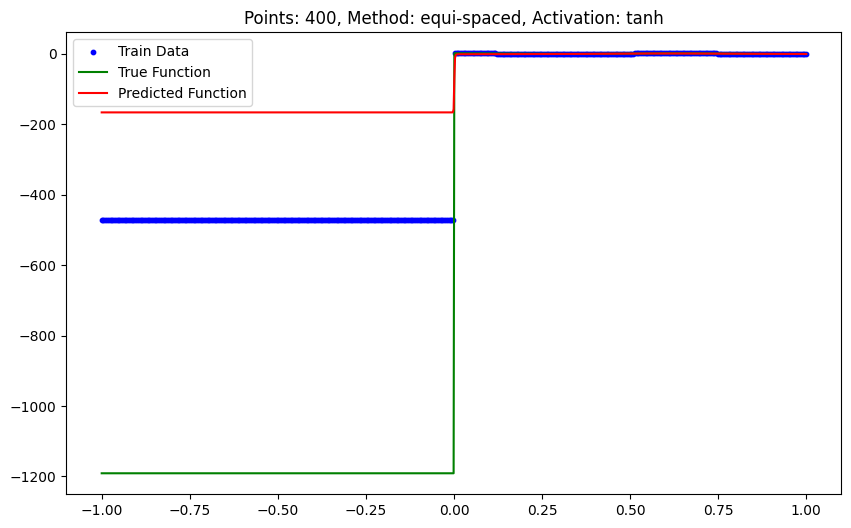

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


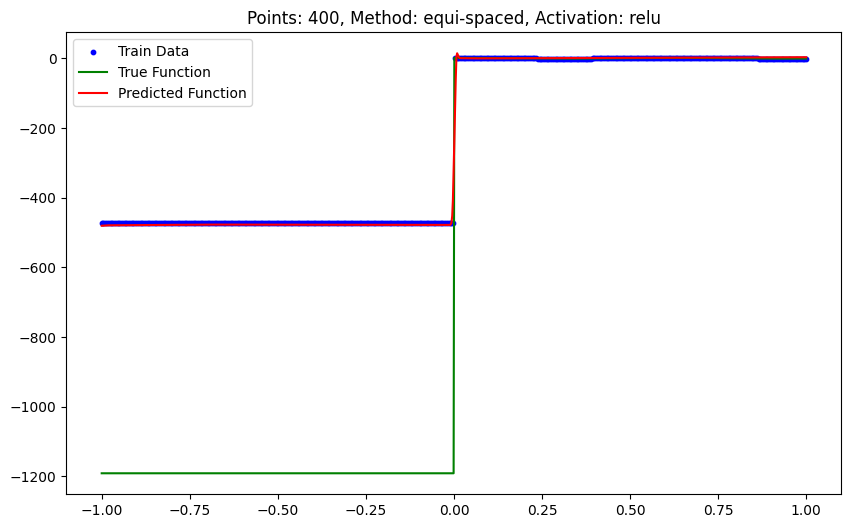

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


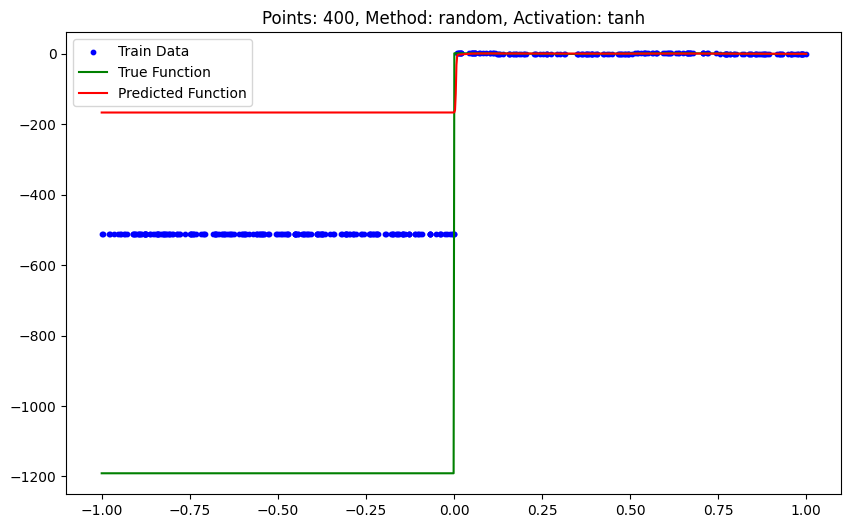

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


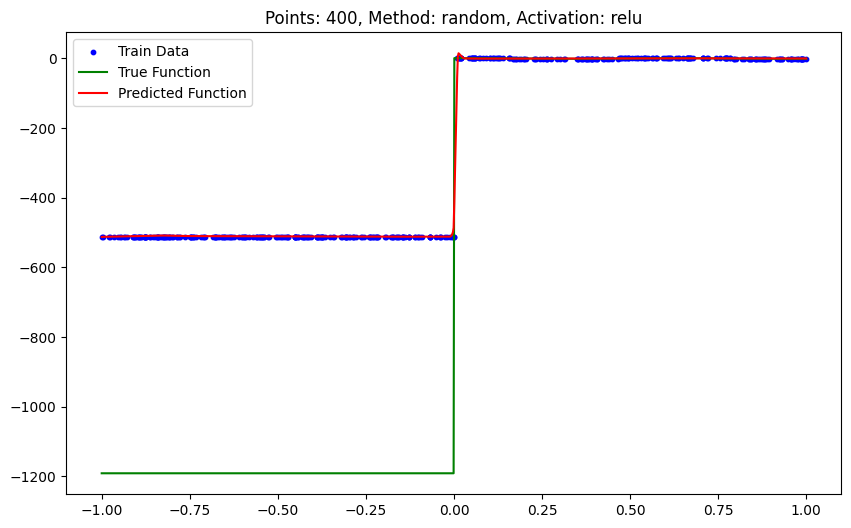

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


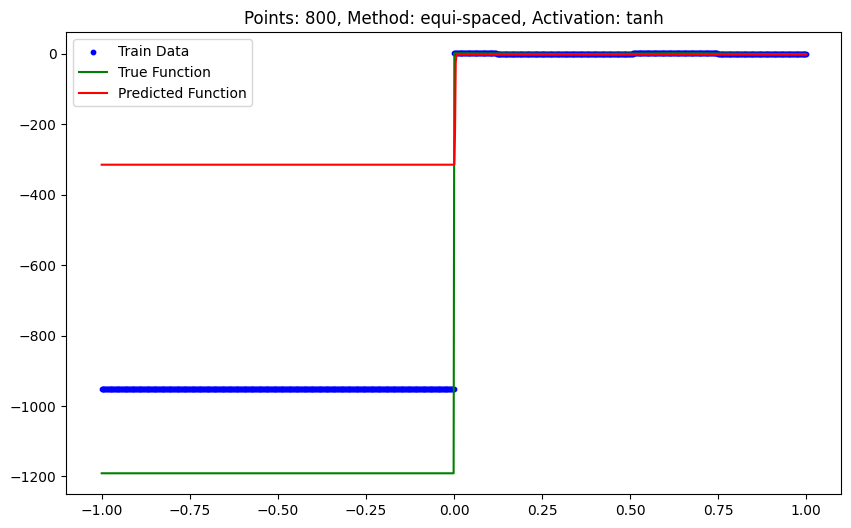

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


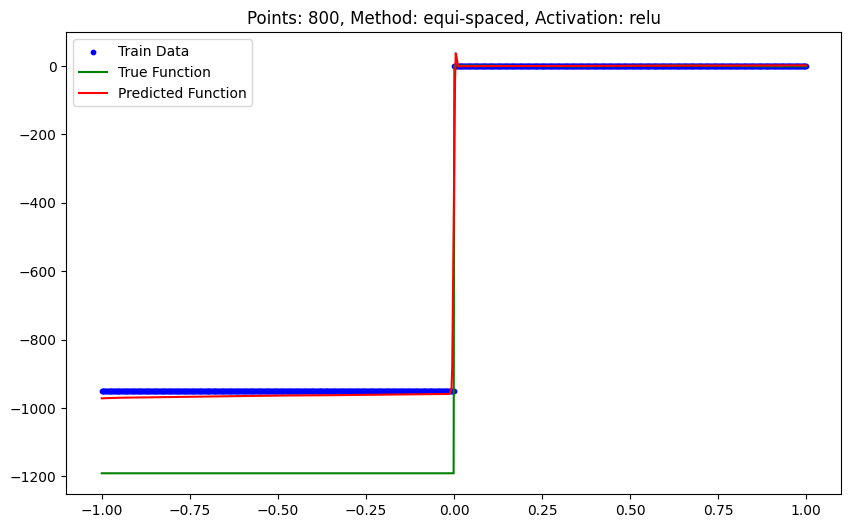

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


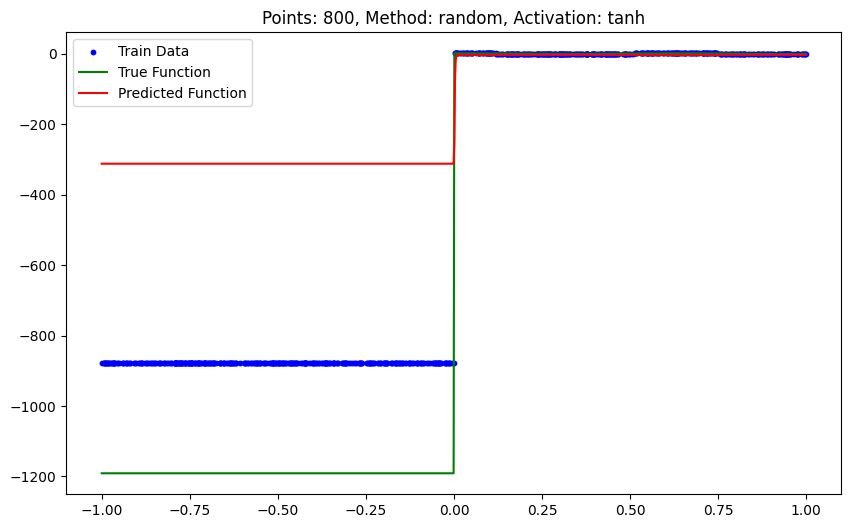

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


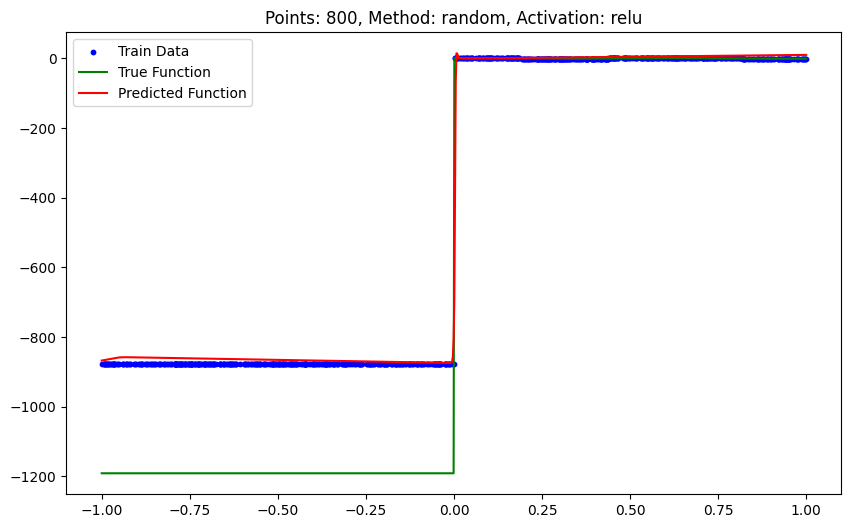

In [13]:

if __name__ == '__main__':
    main()

In [19]:
import tensorflow as tf

def laplacian_tf(f, x, y, z):
    with tf.GradientTape(persistent=True) as tape2:
        tape2.watch([x, y, z])
        with tf.GradientTape(persistent=True) as tape:
            tape.watch([x, y, z])
            f_val = f(x, y, z)
        f_x = tape.gradient(f_val, x)
        f_y = tape.gradient(f_val, y)
        f_z = tape.gradient(f_val, z)
    f_xx = tape2.gradient(f_x, x)
    f_yy = tape2.gradient(f_y, y)
    f_zz = tape2.gradient(f_z, z)
    return f_xx + f_yy + f_zz

# Define the test functions
def f1(x, y, z):
    return tf.sqrt(x * y) + z

def f2(x, y, z):
    return tf.sqrt(3 * x**2 + y**2 + 5 * z**2)

def f3(x, y, z):
    return x**7 * y**5

def f4(x, y, z):
    return tf.sqrt(1 / (x**2 + y**2 + z**2))

# Test the Laplacian operator on the example functions
x = tf.constant(1.0)
y = tf.constant(2.0)
z = tf.constant(3.0)

print("TensorFlow results:")
try:
    print("Laplacian of f1:", laplacian_tf(f1, x, y, z).numpy())
except Exception as e:
    print(f"Error in computing Laplacian of f1: {e}")

try:
    print("Laplacian of f2:", laplacian_tf(f2, x, y, z).numpy())
except Exception as e:
    print(f"Error in computing Laplacian of f2: {e}")

try:
    print("Laplacian of f3:", laplacian_tf(f3, x, y, z).numpy())
except Exception as e:
    print(f"Error in computing Laplacian of f3: {e}")

try:
    print("Laplacian of f4:", laplacian_tf(f4, x, y, z).numpy())
except Exception as e:
    print(f"Error in computing Laplacian of f4: {e}")


TensorFlow results:
Error in computing Laplacian of f1: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.
Laplacian of f2: 0.6133704
Error in computing Laplacian of f3: Argument `target` should be a list or nested structure of Tensors, Variables or CompositeTensors to be differentiated, but received None.
Laplacian of f4: 0.0


In [18]:
import torch

def laplacian_torch(f, x, y, z):
    x.requires_grad_(True)
    y.requires_grad_(True)
    z.requires_grad_(True)
   
    f_val = f(x, y, z)
    
    f_x = torch.autograd.grad(f_val, x, create_graph=True, allow_unused=True)[0]
    f_y = torch.autograd.grad(f_val, y, create_graph=True, allow_unused=True)[0]
    f_z = torch.autograd.grad(f_val, z, create_graph=True, allow_unused=True)[0]
    
    f_xx = torch.autograd.grad(f_x, x, create_graph=True, allow_unused=True)[0] if f_x is not None else None
    f_yy = torch.autograd.grad(f_y, y, create_graph=True, allow_unused=True)[0] if f_y is not None else None
    f_zz = torch.autograd.grad(f_z, z, create_graph=True, allow_unused=True)[0] if f_z is not None else None
    
    return sum(filter(None, [f_xx, f_yy, f_zz]))

# Define the test functions
def f1(x, y, z):
    return torch.sqrt(x * y) + z

def f2(x, y, z):
    return torch.sqrt(3 * x**2 + y**2 + 5 * z**2)

def f3(x, y, z):
    return x**7 * y**5

def f4(x, y, z):
    return torch.sqrt(1 / (x**2 + y**2 + z**2))

# Test the Laplacian operator on the example functions
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)

print("\nPyTorch results:")
try:
    print("Laplacian of f1:", laplacian_torch(f1, x, y, z).item())
except Exception as e:
    print(f"Error in computing Laplacian of f1: {e}")

try:
    print("Laplacian of f2:", laplacian_torch(f2, x, y, z).item())
except Exception as e:
    print(f"Error in computing Laplacian of f2: {e}")

try:
    print("Laplacian of f3:", laplacian_torch(f3, x, y, z).item())
except Exception as e:
    print(f"Error in computing Laplacian of f3: {e}")

try:
    print("Laplacian of f4:", laplacian_torch(f4, x, y, z).item())
except Exception as e:
    print(f"Error in computing Laplacian of f4: {e}")



PyTorch results:
Error in computing Laplacian of f1: element 0 of tensors does not require grad and does not have a grad_fn
Laplacian of f2: 0.613370418548584
Laplacian of f3: 1504.0
Laplacian of f4: 5.587935447692871e-09


c:\Users\sysad\Project\PINN\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━

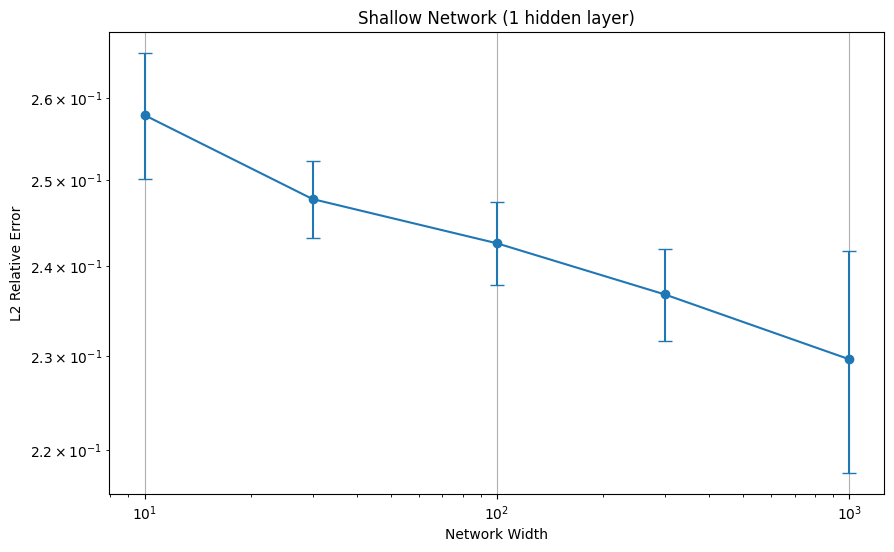

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━

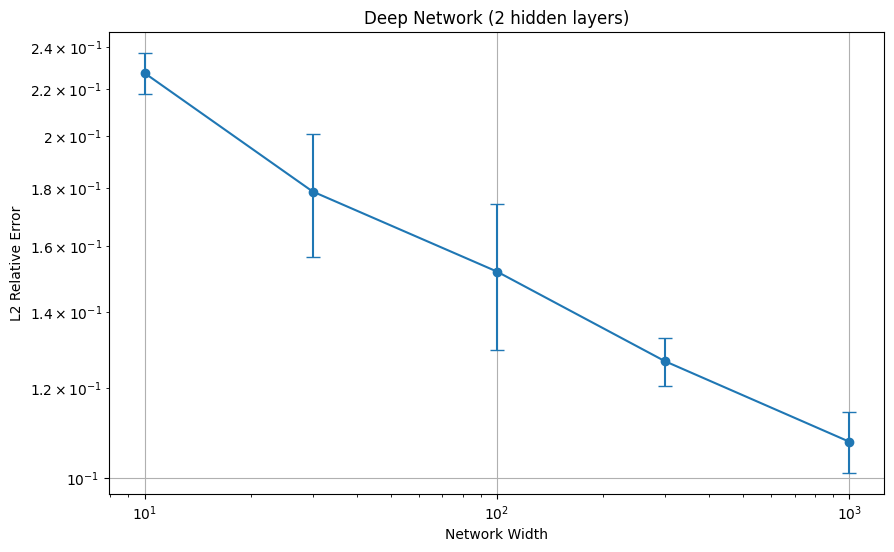

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the oscillatory function
def oscillatory_function(x):
    return np.where(x < 0, 5 + np.sum([np.sin(k * x) for k in range(1, 5)], axis=0), np.cos(10 * x))

# Generate the training and testing datasets
def generate_data(num_points, range_min=-np.pi, range_max=np.pi):
    x = np.linspace(range_min, range_max, num_points)
    y = oscillatory_function(x)
    return x, y

# Define the neural network model
def build_model(width, num_hidden_layers=1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(1,)))
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(width, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation=None))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Compute the L2 relative error
def compute_l2_relative_error(model, x_test, y_test):
    y_pred = model.predict(x_test)
    numerator = np.sqrt(np.sum((y_pred.flatten() - y_test)**2))
    denominator = np.sqrt(np.sum(y_test**2))
    return numerator / denominator

# Run the experiment with different network widths
def run_experiment(widths, num_runs=10, num_hidden_layers=1):
    x_train, y_train = generate_data(200)
    x_test, y_test = generate_data(500)

    errors_mean = []
    errors_std = []

    for width in widths:
        errors = []
        for seed in range(num_runs):
            tf.random.set_seed(seed)
            np.random.seed(seed)
            
            model = build_model(width, num_hidden_layers)
            model.fit(x_train, y_train, epochs=1000, verbose=0)
            
            error = compute_l2_relative_error(model, x_test, y_test)
            errors.append(error)
        
        errors_mean.append(np.mean(errors))
        errors_std.append(np.std(errors))
    
    return errors_mean, errors_std

# Plot the results
def plot_results(widths, errors_mean, errors_std, title):
    plt.figure(figsize=(10, 6))
    plt.errorbar(widths, errors_mean, yerr=errors_std, fmt='o-', capsize=5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Network Width')
    plt.ylabel('L2 Relative Error')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Define the network widths to test
widths = [10, 30, 100, 300, 1000]

# Run the experiment for a shallow network (1 hidden layer)
errors_mean, errors_std = run_experiment(widths, num_runs=10, num_hidden_layers=1)
plot_results(widths, errors_mean, errors_std, 'Shallow Network (1 hidden layer)')

# Run the experiment for a deep network (2 hidden layers)
errors_mean, errors_std = run_experiment(widths, num_runs=10, num_hidden_layers=2)
plot_results(widths, errors_mean, errors_std, 'Deep Network (2 hidden layers)')
